<a href="https://colab.research.google.com/github/KhafidhotulUrfa/MSIB_Project/blob/main/K_Means_Transaksi_Bursa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data
path='/content/drive/MyDrive/MSIB/Penyelesaian Transaksi.xlsx'
#Load data from drive
load_data_Ptrans = pd.read_excel(path)
#membentuk data frame
df=pd.DataFrame(load_data_Ptrans)
df.head()

,Transaksi Bursa,ACS,PME,Penyelesaian Transaksi
0,1.358762e+10,764900,5933300,3.586516e+09
1,1.454014e+10,4686300,7352100,4.115837e+09
2,1.522594e+10,1750500,7569300,4.417133e+09
3,1.540786e+10,1095700,1131400,4.563991e+09
4,1.421987e+10,4195800,6055500,4.532865e+09


In [ ]:
df.isnull().sum()

Transaksi Bursa           0
ACS                       0
PME                       0
Penyelesaian Transaksi    0
dtype: int64

In [ ]:
df.isna().sum()

Transaksi Bursa           0
ACS                       0
PME                       0
Penyelesaian Transaksi    0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Mentukan Input Variabel
x=df[['Transaksi Bursa',	'ACS',	'PME', 'Penyelesaian Transaksi']]
#Karena unsupervised learning tidak ada variabel target

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

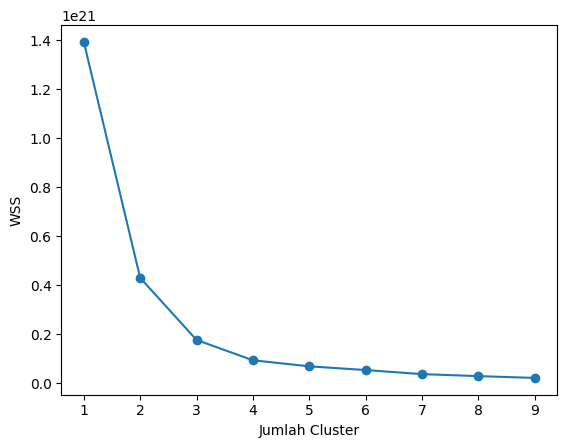

In [ ]:
cluster_range=range(1,10)

cluster_wss=[]

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range,cluster_wss, marker='o')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
#Menetukan kongfigurasi KMeans pada model
cls=KMeans(n_clusters=5,random_state=0)
#Membentuk Model
model_cls=cls.fit(x)

score=silhouette_score(x,cls.labels_).round(3)

print ('Score Silhouette :', score)

Score Silhouette : 0.507


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(cls.inertia_)

6.889429061675827e+19


In [ ]:
df['cluster']=model_cls.labels_

In [ ]:
df.head()

,Transaksi Bursa,ACS,PME,Penyelesaian Transaksi,cluster
0,1.358762e+10,764900,5933300,3.586516e+09,1
1,1.454014e+10,4686300,7352100,4.115837e+09,4
2,1.522594e+10,1750500,7569300,4.417133e+09,4
3,1.540786e+10,1095700,1131400,4.563991e+09,4
4,1.421987e+10,4195800,6055500,4.532865e+09,4


In [ ]:
from google.colab import files
#Menimpan File/Export File to Local computer output CSV file
df.to_excel('df_cluster.xlsx')
files.download('df_cluster.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output =plt.scatter(x[:,0], x[:,1],s=100, c=df.cluster,marker="o", alpha=1);
centers=cls.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red', s=200, alpha=1, marker="o");
plt.title('Hasil Clustering K-Means')
plt.colorbar(output)
plt.show()

InvalidIndexError: ignored

In [ ]:
=